In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 


# CapStone II Project

In [2]:
#The downlaod and read the raw data 
df = pd.read_csv('vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [3]:
#check the number of rows and columns
df.shape

(423857, 25)

In [4]:
#See the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

In [5]:
df['model'].value_counts().head(10)

f-150             6073
silverado 1500    3878
escape            3208
camry             2906
1500              2898
accord            2813
altima            2592
explorer          2481
civic             2472
silverado         2321
Name: model, dtype: int64

In [6]:
#The number of model in used car dataset
df['model'].nunique()


27042

In [7]:
#The type and the number of car manufacturer companies
df['manufacturer'].unique()

array(['gmc', 'hyundai', 'toyota', 'mitsubishi', 'ford', 'chevrolet',
       'ram', nan, 'buick', 'jeep', 'dodge', 'subaru', 'nissan', 'audi',
       'rover', 'lexus', 'honda', 'chrysler', 'mini', 'pontiac',
       'mercedes-benz', 'cadillac', 'bmw', 'kia', 'volvo', 'volkswagen',
       'jaguar', 'acura', 'saturn', 'mazda', 'mercury', 'lincoln',
       'infiniti', 'ferrari', 'fiat', 'tesla', 'land rover',
       'harley-davidson', 'datsun', 'alfa-romeo', 'morgan',
       'aston-martin', 'porche', 'hennessey'], dtype=object)

In [8]:
#copey original dataframe   
df1 = df.copy()

In [9]:
#The type of variables or features
df1.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [10]:
# Sub grouping the variable to be dropped 

df1 = df1.drop(['id', 'url','region','region_url', 'vin','lat', 'long', 'image_url','description',
                'model', 'drive','county', 'state'], axis = 1)
df1.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,size,type,paint_color
0,6995,2000.0,gmc,excellent,8 cylinders,gas,167783.0,clean,automatic,NaN,NaN,red
1,8750,2013.0,hyundai,excellent,4 cylinders,gas,90821.0,clean,automatic,NaN,NaN,grey
2,10900,2013.0,toyota,good,4 cylinders,hybrid,92800.0,clean,automatic,NaN,NaN,blue
3,12500,2003.0,mitsubishi,good,4 cylinders,gas,NaN,clean,manual,mid-size,sedan,grey
4,16995,2007.0,gmc,good,8 cylinders,diesel,254217.0,clean,automatic,full-size,truck,white


In [11]:
#check the dimension - dimension reduced from 25 to 12 features using subset drop method
df1.shape

(423857, 12)

In [12]:
# change dtype for price from integer to floating
df1.price = df1.price.astype('float')
df1.price.dtype

dtype('float64')

In [13]:
#change make year from float to data time
df1.year = pd.to_datetime(df1['year'], format = '%y%m%d', errors = 'coerce')
df1.year.dtype

dtype('<M8[ns]')

In [14]:
df1.info()
# dtype of  year is changed into datetime, and price to float type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   price         423857 non-null  float64       
 1   year          212986 non-null  datetime64[ns]
 2   manufacturer  313242 non-null  object        
 3   condition     176719 non-null  object        
 4   cylinders     197679 non-null  object        
 5   fuel          327214 non-null  object        
 6   odometer      270585 non-null  float64       
 7   title_status  327759 non-null  object        
 8   transmission  328065 non-null  object        
 9   size          102627 non-null  object        
 10  type          241157 non-null  object        
 11  paint_color   222203 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 38.8+ MB


In [13]:
#Check the number of null values of the dataframe
#df1.dropna(axis = 0, how = 'any', inplace = True)
#df1

In [15]:
#The Count and percentage of null values 

missing = pd.DataFrame(df1.isnull().sum())
missing.columns = ['count']
missing['%'] = ( missing['count'] /len(df1)) *100
missing.sort_values(by='count', ascending=False).head(15)

,count,%
size,321230,75.787353
condition,247138,58.306929
cylinders,226178,53.361865
year,210871,49.750505
paint_color,201654,47.575951
type,182700,43.104160
odometer,153272,36.161252
manufacturer,110615,26.097245
fuel,96643,22.800850
title_status,96098,22.672269


In [16]:
#check the shape of skewness
print(df1['price'].skew())
df1['price'].describe()

286.6653149470297


count    4.238570e+05
mean     5.779437e+04
std      1.002581e+07
min      0.000000e+00
25%      4.499000e+03
50%      9.995000e+03
75%      1.899500e+04
max      3.808256e+09
Name: price, dtype: float64

#positive skew 286.66 means the distribution is skewed extermely to the right

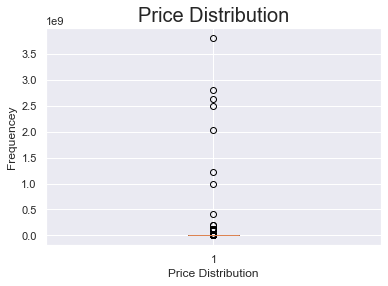

In [17]:
# box plot for the price
sn.set()
plt.boxplot(df1['price'])
plt.xlabel('Price Distribution')
plt.ylabel('Frequencey')
plt.title('Price Distribution', size = 20)
plt.show()

In [22]:
# From box plot There are  extremely autliers thus the feature need attention in
# trimming the exterme  data points.

Median of the distribution is between 0.1 - 0.2  compared the max range value near to 4

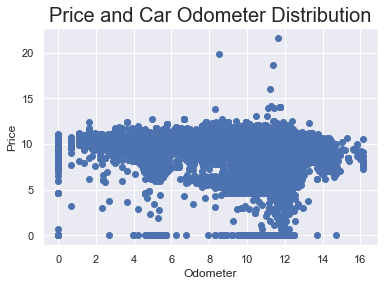

In [19]:
#scatterplot for price and Make year distribution
#fig, ax = plt.subplots(figsize = (12, 6))

plt.scatter(np.log(df1['odometer']), np.log(df1['price']), marker = 'o')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Price and Car Odometer Distribution', size = 20)
plt.show()

In [23]:
#The scatter plot illustrated that removing extreme values or outliers enhance the scale of distribution

In [20]:
#Filter used cars Price above hunderd thousands considered as outlier
index = df1[(df1['price'] > 100000) | (df1['price'] < 750)].index
df1.drop(index, inplace = True)
df1['price'].describe()

count    376494.000000
mean      15345.177562
std       12823.165385
min         750.000000
25%        5999.000000
50%       11950.000000
75%       19999.000000
max      100000.000000
Name: price, dtype: float64

We can easily understand the price value for some cars beyond the range of car price or it is 
exterme therefore dropping such values enhance the accuracy of prediction.

In [23]:
# Check the minimum used cars price
#df1['price'] = df1[df1['price'] > 750]
#price_below_limit.sort_values(by = 'price', ascending = True).head(5)
#assert df1['price'].min() > 750

In [21]:
#Filter Odometer range above 300000 and range belwo 10000
index = df1[(df1['odometer'] > 300000) | (df1['odometer'] < 10000)].index
df1.drop(index, inplace = True)
df1['odometer'].describe()

count    230777.000000
mean     101796.347643
std       58191.121225
min       10000.000000
25%       53188.000000
50%       97023.000000
75%      141000.000000
max      300000.000000
Name: odometer, dtype: float64

There are price values which has zero or below $750  value should be removed, for they inhibit the prediction accuracy

In [20]:
# few cars odometers values is extremely large which emanating from either typo error 
# or data collection error, such  extreme values result to poor prediction accuracy and should drop the
# values from the dataset.

 Odometer above 300K is considered as extreme value and need to drop the outliers from the dataset

In [25]:
#Trimming the outliers from Price
#index = df1[(df1['price'] > 100000) | (df1['price'] < 750)].index
#df1.drop(index, inplace = True)
#df1['price'].describe()

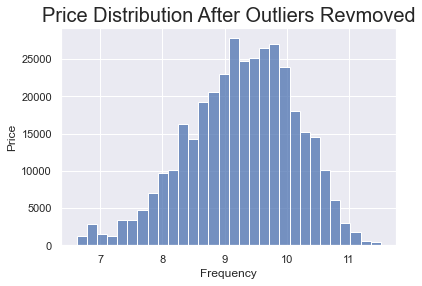

In [22]:
# After removing the exterme values from price series, the box plot shows there is still extreme values 
# far beyond the interquartile range.
sn.set()
sn.histplot(np.log(df1['price']), bins =30)
plt.xlabel('Frequency')
plt.ylabel('Price')
plt.title('Price Distribution After Outliers Revmoved', size = 20)
plt.show()

In [ ]:
# Although siginficant improvement  has shown after removing too extreme outliers but still there is 
# extreme outlier is obsereved. The histogram exteremly skewned to the left

In [23]:

#Trimming the outliers from Price
index = df1[(df1['odometer'] > 300000) | (df1['odometer'] < 10000)].index
df1.drop(index, inplace = True)
df1['odometer'].describe()

count    230777.000000
mean     101796.347643
std       58191.121225
min       10000.000000
25%       53188.000000
50%       97023.000000
75%      141000.000000
max      300000.000000
Name: odometer, dtype: float64

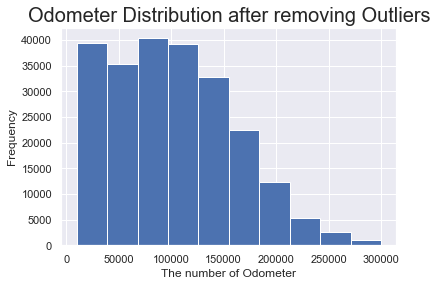

In [25]:
# histogram for 'odometer' Distirbution
plt.hist(df1['odometer'], bins = 10)
plt.xlabel('The number of Odometer')
plt.ylabel('Frequency')
plt.title('Odometer Distribution after removing Outliers', size = 20)
plt.show()

In [24]:
# Odometer histogram plot skewed to right

In [25]:
#

# Explanatory Data Analysis

In [26]:
# check the dataframe missing value afer forward filling
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363627 entries, 0 to 423856
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   price         363627 non-null  float64       
 1   year          177366 non-null  datetime64[ns]
 2   manufacturer  267575 non-null  object        
 3   condition     156149 non-null  object        
 4   cylinders     172182 non-null  object        
 5   fuel          278142 non-null  object        
 6   odometer      230777 non-null  float64       
 7   title_status  278603 non-null  object        
 8   transmission  279057 non-null  object        
 9   size          88793 non-null   object        
 10  type          204347 non-null  object        
 11  paint_color   193066 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 46.1+ MB


In [27]:
#Remove the missing value detected in 'size' and 'type ' freatures
df1 = df1.fillna(method = 'ffill')
df1.isnull().sum()

price           0
year            1
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
size            3
type            3
paint_color     0
dtype: int64

In [28]:
df1 = df1.fillna(method = 'bfill')


In [29]:
# Now there is no null have each features have eq
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363627 entries, 0 to 423856
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   price         363627 non-null  float64       
 1   year          363627 non-null  datetime64[ns]
 2   manufacturer  363627 non-null  object        
 3   condition     363627 non-null  object        
 4   cylinders     363627 non-null  object        
 5   fuel          363627 non-null  object        
 6   odometer      363627 non-null  float64       
 7   title_status  363627 non-null  object        
 8   transmission  363627 non-null  object        
 9   size          363627 non-null  object        
 10  type          363627 non-null  object        
 11  paint_color   363627 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 46.1+ MB


In [30]:
# The condition catergories after removing null values 
df1['condition'].unique()

array(['excellent', 'good', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [32]:
#Map condition type catergories 
condition_type = {'excellent':5, 'good': 4,'new':6, 'like new':2, 'salvage':1, 'fiar':3}

In [33]:
df1['condition'] = df1['condition'].map(condition_type)
df1.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,size,type,paint_color
0,6995.0,2020-01-03,gmc,5.0,8 cylinders,gas,167783.0,clean,automatic,mid-size,sedan,red
1,8750.0,2020-01-03,hyundai,5.0,4 cylinders,gas,90821.0,clean,automatic,mid-size,sedan,grey
2,10900.0,2020-01-03,toyota,4.0,4 cylinders,hybrid,92800.0,clean,automatic,mid-size,sedan,blue
3,12500.0,2020-01-03,mitsubishi,4.0,4 cylinders,gas,92800.0,clean,manual,mid-size,sedan,grey
4,16995.0,2020-01-03,gmc,4.0,8 cylinders,diesel,254217.0,clean,automatic,full-size,truck,white


In [34]:
#cyliners types
df1['cylinders'].unique()

array(['8 cylinders', '4 cylinders', '6 cylinders', '10 cylinders',
       '12 cylinders', '5 cylinders', '3 cylinders', 'other'],
      dtype=object)

In [35]:
cylinders_type =  {'4 cylinders': 4, '8 cylinders': 8, '6 cylinders': 6,'3 cylinders': 3,'12 cylinders' :12,
                   '10 cylinders': 10}

In [36]:
df1['cylinders'] =  df1['cylinders'].map(cylinders_type)

In [37]:
df1['fuel'].unique()


array(['gas', 'hybrid', 'diesel', 'other', 'electric'], dtype=object)

In [38]:
fuel_type = {'gas':5,  'diesel':3, 'other':1, 'electric': 4, 'hybrid':2}
df1['fuel'] = df1['fuel'].map(fuel_type)
df1.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,size,type,paint_color
0,6995.0,2020-01-03,gmc,5.0,8.0,5,167783.0,clean,automatic,mid-size,sedan,red
1,8750.0,2020-01-03,hyundai,5.0,4.0,5,90821.0,clean,automatic,mid-size,sedan,grey
2,10900.0,2020-01-03,toyota,4.0,4.0,2,92800.0,clean,automatic,mid-size,sedan,blue
3,12500.0,2020-01-03,mitsubishi,4.0,4.0,5,92800.0,clean,manual,mid-size,sedan,grey
4,16995.0,2020-01-03,gmc,4.0,8.0,3,254217.0,clean,automatic,full-size,truck,white


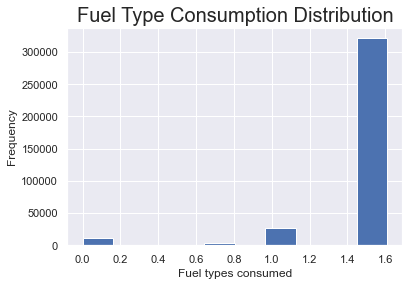

In [39]:
# Histogram plot of fuel type and its distribution
sn.set()
_= plt.hist(np.log(df1['fuel']))
_= plt.xlabel('Fuel types consumed')
_= plt.ylabel('Frequency')
_= plt.title('Fuel Type Consumption log Distribution', size = 20)
plt.show()

In [49]:
# Histogram plot of fuel type 


In [40]:
df1['title_status'].unique()

array(['clean', 'lien', 'rebuilt', 'salvage', 'missing', 'parts only'],
      dtype=object)

In [41]:
title_status = {'clean':5, 'lien':3,'rebuilt': 4, 'salvage':2, 'missing':1, 'parts only':0}

In [42]:
df1['title_status'] = df1['title_status'].map(title_status)

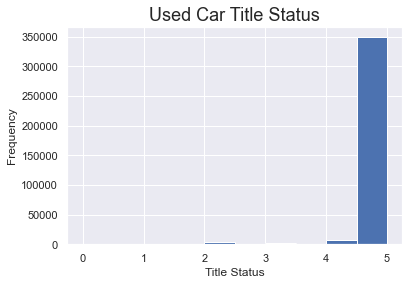

In [43]:
# USED CAR TITLE STATUS : Histogram plot on used cars title status
sn.set()
_=plt.hist(df1['title_status'])
_=plt.xlabel('Title Status')
_=plt.ylabel('Frequency')
_=plt.title('Used Car Title Status', size = 18)
plt.show()

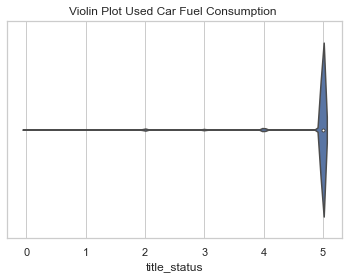

In [44]:
sn.set_theme(style = 'whitegrid')
sn.violinplot(x = df1['title_status'])
plt.title('Violin Plot Used Car Fuel Consumption ')
plt.show()

In [45]:
df1['transmission'].unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [46]:
transmission_type = {'automatic':3, 'manual':2, 'other':4}

In [47]:
df1['transmission'] = df1['transmission'].map(transmission_type)

In [66]:
# Histogram plot for Transmission type and distribution


In [48]:
df1['size'].unique()

array(['mid-size', 'full-size', 'compact', 'sub-compact'], dtype=object)

In [49]:
size_type = {'mid-size':3, 'full-size': 2, 'compact':1}

In [50]:
df1['size'] = df1['size'].map(size_type)

In [51]:
df1['type'].unique()

array(['sedan', 'truck', 'SUV', 'other', 'mini-van', 'wagon', 'hatchback',
       'coupe', 'pickup', 'convertible', 'van', 'bus', 'offroad'],
      dtype=object)

In [52]:
type_t = {'sedan':12, 'truck':11, 'SUV':10, 'other':9, 'mini-van':8, 'wagon':7, 'hatchback':6,
          'sedan':3, 'truck':2, 'SUV':1,'other': 4,'coupe':5, 'pickup':13, 'convertible':14, 
          'van':15, 'bus':16, 'offroad':17 }

In [53]:
df1['type'] = df1['type'].map(type_t)

In [54]:
df1['paint_color'].unique()

array(['red', 'grey', 'blue', 'white', 'silver', 'brown', 'black',
       'purple', 'custom', 'green', 'orange', 'yellow'], dtype=object)

In [55]:
paint_color = {'grey': 8, 'white':7, 'silver':6, 'blue':5, 'brown':4, 'black':3, 'purple':2, 'red':1,
               'custom':9, 'green':10, 'orange':11, 'yellow':12}

In [56]:
df1['paint_color'] = df1['paint_color'].map(paint_color)

In [57]:
df1['manufacturer'].unique()

array(['gmc', 'hyundai', 'toyota', 'mitsubishi', 'ford', 'chevrolet',
       'buick', 'jeep', 'subaru', 'nissan', 'dodge', 'audi', 'rover',
       'lexus', 'ram', 'chrysler', 'mini', 'pontiac', 'mercedes-benz',
       'cadillac', 'bmw', 'kia', 'volvo', 'volkswagen', 'honda', 'jaguar',
       'acura', 'saturn', 'mazda', 'mercury', 'lincoln', 'infiniti',
       'fiat', 'tesla', 'ferrari', 'harley-davidson', 'datsun',
       'alfa-romeo', 'morgan', 'aston-martin', 'land rover', 'porche',
       'hennessey'], dtype=object)

In [58]:
manu_type = {'mitsubishi':1, 'gmc':2, 'ford':3, 'chevrolet':4, 'buick':5, 'toyota':6,
       'jeep':7, 'subaru':8, 'nissan':9, 'hyundai':10, 'dodge':11, 'audi':12, 'rover':13,
       'lexus':14, 'ram':15, 'chrysler':16, 'mini':17, 'pontiac':18, 'mercedes-benz':19,
       'cadillac':20, 'bmw':21, 'kia':22, 'volvo':23, 'volkswagen':24, 'honda':25, 'jaguar':26,
       'acura':27, 'saturn':28, 'mazda':29, 'mercury':30, 'lincoln':31, 'infiniti':32,
       'fiat':33, 'tesla':34, 'ferrari':35, 'harley-davidson':36, 'datsun':37,
       'alfa-romeo':38, 'morgan':39, 'aston-martin':40, 'land rover':41, 'porche':42,
       'hennessey':43}
df1['manufacturer'] = df1['manufacturer'].map(manu_type)

In [61]:
df1.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,size,type,paint_color
0,6995.0,2020-01-03,2,5.0,8.0,5,167783.0,5,3,3.0,3,1
1,8750.0,2020-01-03,10,5.0,4.0,5,90821.0,5,3,3.0,3,8
2,10900.0,2020-01-03,6,4.0,4.0,2,92800.0,5,3,3.0,3,5
3,12500.0,2020-01-03,1,4.0,4.0,5,92800.0,5,2,3.0,3,8
4,16995.0,2020-01-03,2,4.0,8.0,3,254217.0,5,3,2.0,2,7


In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363627 entries, 0 to 423856
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   price         363627 non-null  float64       
 1   year          363627 non-null  datetime64[ns]
 2   manufacturer  363627 non-null  int64         
 3   condition     348847 non-null  float64       
 4   cylinders     359111 non-null  float64       
 5   fuel          363627 non-null  int64         
 6   odometer      363627 non-null  float64       
 7   title_status  363627 non-null  int64         
 8   transmission  363627 non-null  int64         
 9   size          354230 non-null  float64       
 10  type          363627 non-null  int64         
 11  paint_color   363627 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 46.1 MB


In [ ]:
df1.

Null Hypothesis: There is no significant relation between price and odometer of a car
Alt-Hypothesis: There is a significant relation between price and odometer.
